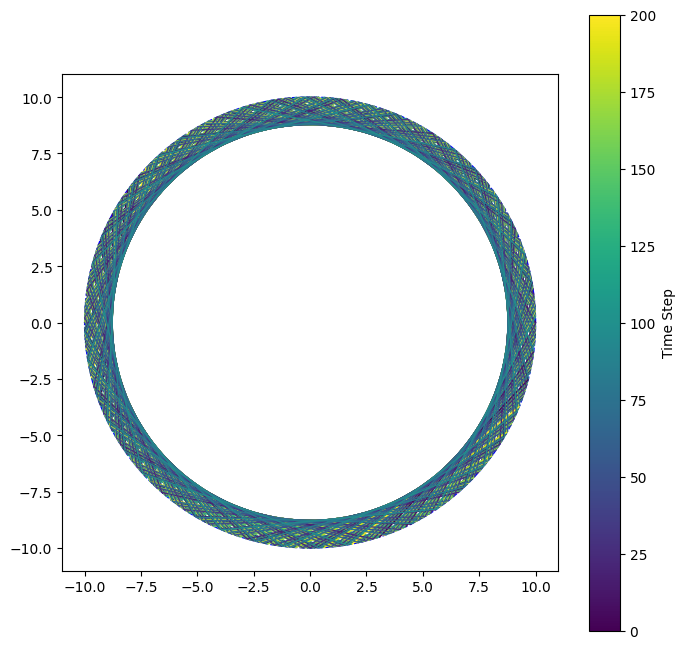

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_ants = 50
circle_radius = 10
angular_velocity = 0.1
num_steps = 200
plot_interval = 10

angles = tf.constant(np.linspace(0, 2 * np.pi, num_ants, endpoint=False), dtype=tf.float32)

all_x_positions = []
all_y_positions = []

def update_positions(angles, angular_velocity):
    return tf.math.mod(angles + angular_velocity, 2 * np.pi)

for step in range(num_steps):
    x = circle_radius * tf.cos(angles).numpy()
    y = circle_radius * tf.sin(angles).numpy()


    all_x_positions.append(x)
    all_y_positions.append(y)

    angles = update_positions(angles, angular_velocity)


plt.figure(figsize=(8, 8))

colors = plt.cm.viridis(np.linspace(0, 1, num_steps // plot_interval))


for ant in range(num_ants):
    ant_x_positions = [all_x_positions[step][ant] for step in range(0, num_steps, plot_interval)]
    ant_y_positions = [all_y_positions[step][ant] for step in range(0, num_steps, plot_interval)]


plt.plot(ant_x_positions, ant_y_positions, color=colors[ant % len(colors)], linewidth=1)

circle = plt.Circle((0, 0), circle_radius, color='blue', fill=False, linestyle='--')
plt.gca().add_artist(circle)

plt.xlim(-circle_radius - 1, circle_radius + 1)
plt.ylim(-circle_radius - 1, circle_radius + 1)
plt.gca().set_aspect('equal', adjustable='box')


sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=0, vmax=num_steps))

ax = plt.gca()

plt.colorbar(sm, ax=ax, label='Time Step')

plt.show()


